# Earnings based on College Majors

The objective of this exercise to try to use various methods to visualize correlation on earnings based on college majors. We will use a variety of graphing methods of scatter plots, histograms, scatter matrix plot. 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo https://github.com/fivethirtyeight/data/tree/master/college-majors. 


The data columns are as follows:-

|Column|Description|
|:-----|:----------|
|Rank|Rank by median earnings (the dataset is ordered by this column).|
|Major_code|Major code.|
|Major|Major description.|
|Major_category|Category of major.|
|Total|Total number of people with major.|
|Sample_size|Sample size (unweighted) of full-time.|
|Men|Male graduates.|
|Women|Female graduates.|
|ShareWomen|Women as share of total.|
|Employed|Number employed.|
|Median|Median salary of full-time, year-round workers.|
|Low_wage_jobs|Number in low-wage service jobs.|
|Full_time|Number employed 35 hours or more.|
|Part_time|Number employed less than 35 hours.|

We would like to explore the following questions, 

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

In [1]:
# Import pandas and matplotlib into the environment.
# Run the Jupyter magic %matplotlib inline so that plots are displayed inline.

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')

In [2]:
# return the first row formatted as a table
first_row = recent_grads.iloc[0]

recent_grads.head(5)
recent_grads.tail(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


For the columns 'Total', 'Men', and 'Women' there is 172 values, not 173. Will need to clean that up. 

In [4]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
first_row

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
recent_grads.tail(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [8]:
# Drop rows with missing values
raw_data_count = recent_grads.count() 
raw_data_count

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

In [9]:
recent_grads = recent_grads.dropna(axis=0)

In [10]:
cleaned_data_count = recent_grads.count() 
cleaned_data_count

Rank                    172
Major_code              172
Major                   172
Total                   172
Men                     172
Women                   172
Major_category          172
ShareWomen              172
Sample_size             172
Employed                172
Full_time               172
Part_time               172
Full_time_year_round    172
Unemployed              172
Unemployment_rate       172
Median                  172
P25th                   172
P75th                   172
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           172
dtype: int64

# Exploring the data

Text(0.5, 1.0, 'Median vs. Sample_size')

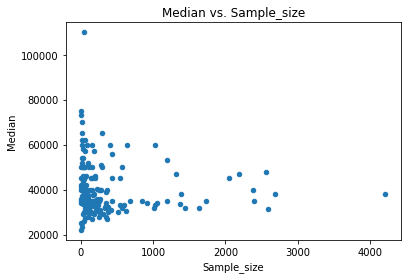

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Median vs. Sample_size')

Text(0.5, 1.0, 'Median vs. Total number of people with major')

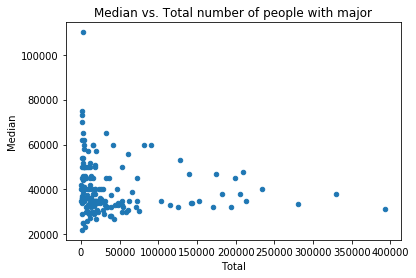

In [12]:
ax = recent_grads.plot(x='Total', y='Median', kind='scatter')
ax.set_title('Median vs. Total number of people with major')

Do students in more popular majors make more money?
There does not appear to be a correlation here. As such, it appears that popular majors does not necessarily equate to more money earned

Text(0.5, 1.0, 'Unemployment Rate vs. Sample_size')

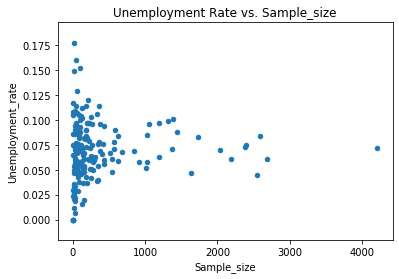

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment Rate vs. Sample_size')

Text(0.5, 1.0, 'Median vs. Full time')

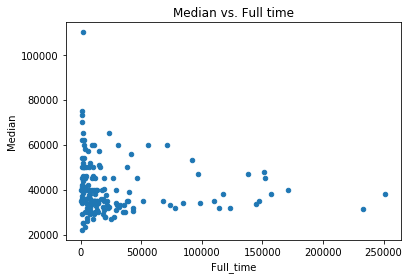

In [14]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Median vs. Full time')

Is there any link between the number of full-time employees and median salary?
There also does not appear to have a link between these 2 factors.

Text(0.5, 1.0, 'Women as share of Total vs. Unemployment rate')

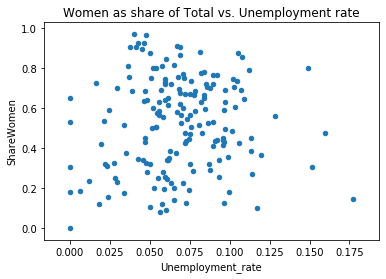

In [15]:
ax = recent_grads.plot(x='Unemployment_rate', y='ShareWomen', kind='scatter')
ax.set_title('Women as share of Total vs. Unemployment rate')

Text(0.5, 1.0, 'Men vs. Median')

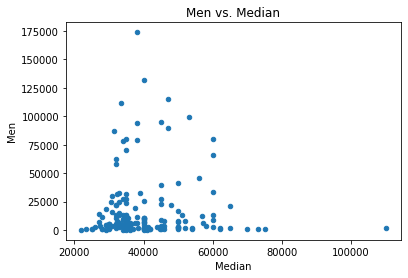

In [16]:
ax = recent_grads.plot(x='Median', y='Men', kind='scatter')
ax.set_title('Men vs. Median')

Text(0.5, 1.0, 'Women vs. Median')

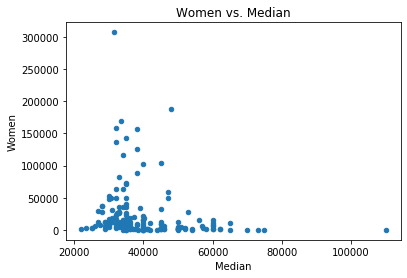

In [17]:
ax = recent_grads.plot(x='Median', y='Women', kind='scatter')
ax.set_title('Women vs. Median')

Do students that majored in subjects that were majority female make more money?
No, again there is also no correlation between gender in the Majors versus the earnings

# Exploring the distribution of the data

Let's explore the distribution of the data using histogram. 

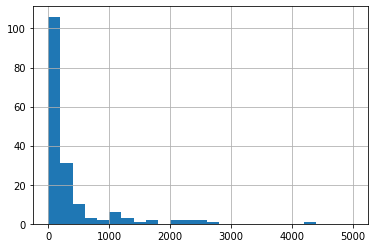

In [18]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

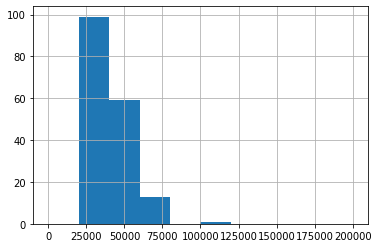

In [19]:
recent_grads['Median'].hist(bins=10, range=(0,200000))

Most common median salary range is 25000

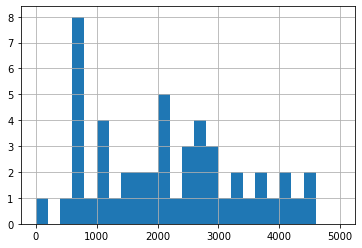

In [20]:
recent_grads['Employed'].hist(bins=25, range=(0,5000))

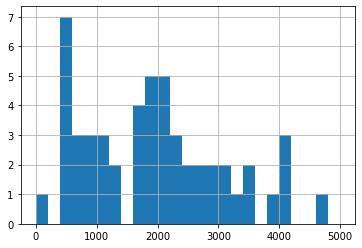

In [21]:
recent_grads['Full_time'].hist(bins=25, range=(0,5000))

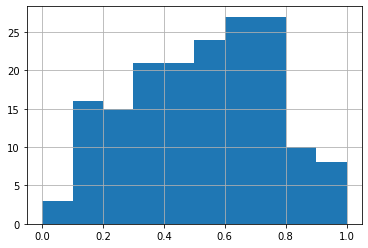

In [22]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

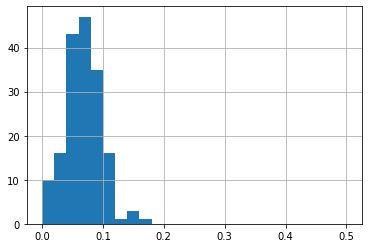

In [23]:
recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.5))

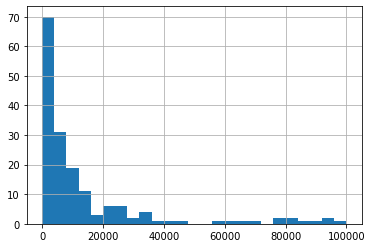

In [24]:
recent_grads['Men'].hist(bins=25, range=(0,100000))

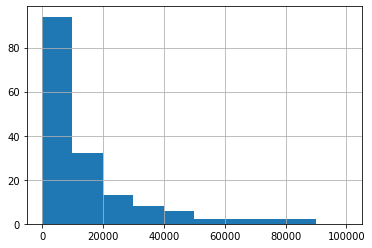

In [25]:
recent_grads['Women'].hist(bins=10, range=(0,100000))

In [26]:
no_men = recent_grads["Men"] == 0
recent_graduates_no_men = recent_grads.loc[no_men,]
recent_graduates_no_men

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


In [27]:
no_women = recent_grads["Women"] == 0
recent_graduates_no_women = recent_grads.loc[no_women,]
recent_graduates_no_women

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


In [28]:
# More men
more_men = recent_grads["ShareWomen"] <= 0.5
recent_graduates_more_men = recent_grads.loc[more_men,]
recent_graduates_more_men

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,4801,PHILOSOPHY AND RELIGIOUS STUDIES,54814.0,31967.0,22847.0,Humanities & Liberal Arts,0.416810,375,40157,...,16659,21816,4267,0.096052,32200,23000,47100,14444,20313,8051
141,142,6005,FILM VIDEO AND PHOTOGRAPHIC ARTS,38761.0,22357.0,16404.0,Arts,0.423209,331,31433,...,12818,15740,3718,0.105772,32000,22000,42000,7368,20721,5862
143,144,1105,PLANT SCIENCE AND AGRONOMY,7416.0,4897.0,2519.0,Agriculture & Natural Resources,0.339671,110,6594,...,1246,4522,314,0.045455,32000,22900,40000,2089,3545,1231
147,148,2306,PHYSICAL AND HEALTH EDUCATION TEACHING,28213.0,15670.0,12543.0,Education,0.444582,259,23794,...,7230,13651,1920,0.074667,31000,24000,40000,12777,9328,2042


In [29]:
# More women
more_women = recent_grads["ShareWomen"] > 0.5
recent_graduates_more_women = recent_grads.loc[more_women,]
recent_graduates_more_women

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
39,40,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",2116.0,528.0,1588.0,Physical Sciences,0.750473,31,1778,...,579,1115,137,0.071540,46000,38000,53000,162,1475,124
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


What percent of majors are predominantly male? Predominantly female?

As the total number of rows is 172, predominantly majors for male is 44%.
Predominantly majors for female is 56%

# Visualizing correlation

A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

In [30]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11974b7b8>,
      dtype=object)

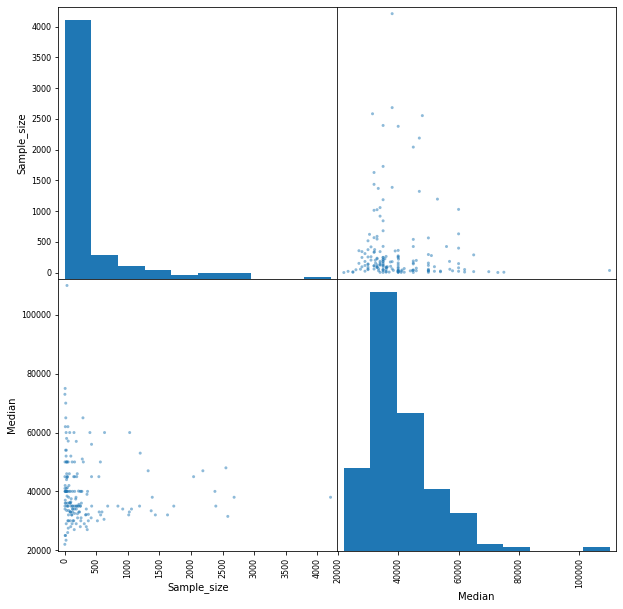

In [31]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

Observation - majority of the earnings is about 30K. Those really high earners at 100K is low frequency. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b6b7f0>,
      dtype=object)

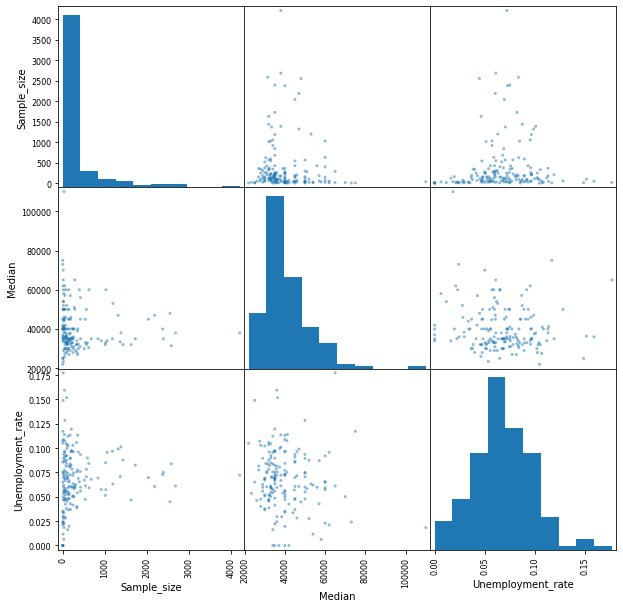

In [32]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

Observation : There appears to have a weak correlation between Median and Unemployment Rate. 

# Visualizing the data using Bar Plots

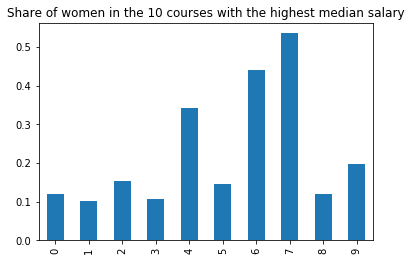

In [43]:
recent_grads[:10]['ShareWomen'].plot(kind='bar', title='Share of women in the 10 courses with the highest median salary')

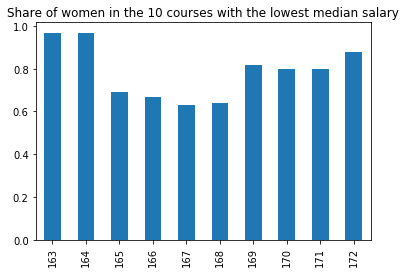

In [45]:
recent_grads[-10:]['ShareWomen'].plot(kind='bar', title='Share of women in the 10 courses with the lowest median salary')

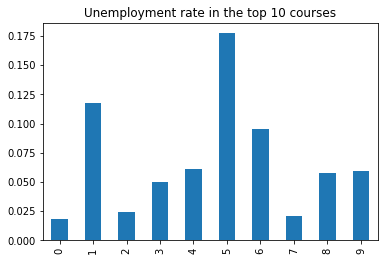

In [47]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar', title='Unemployment rate in the top 10 courses')

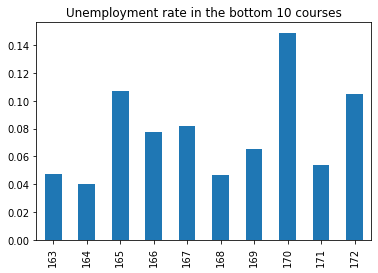

In [48]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar', title='Unemployment rate in the bottom 10 courses')

# Further Analysis

##### Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

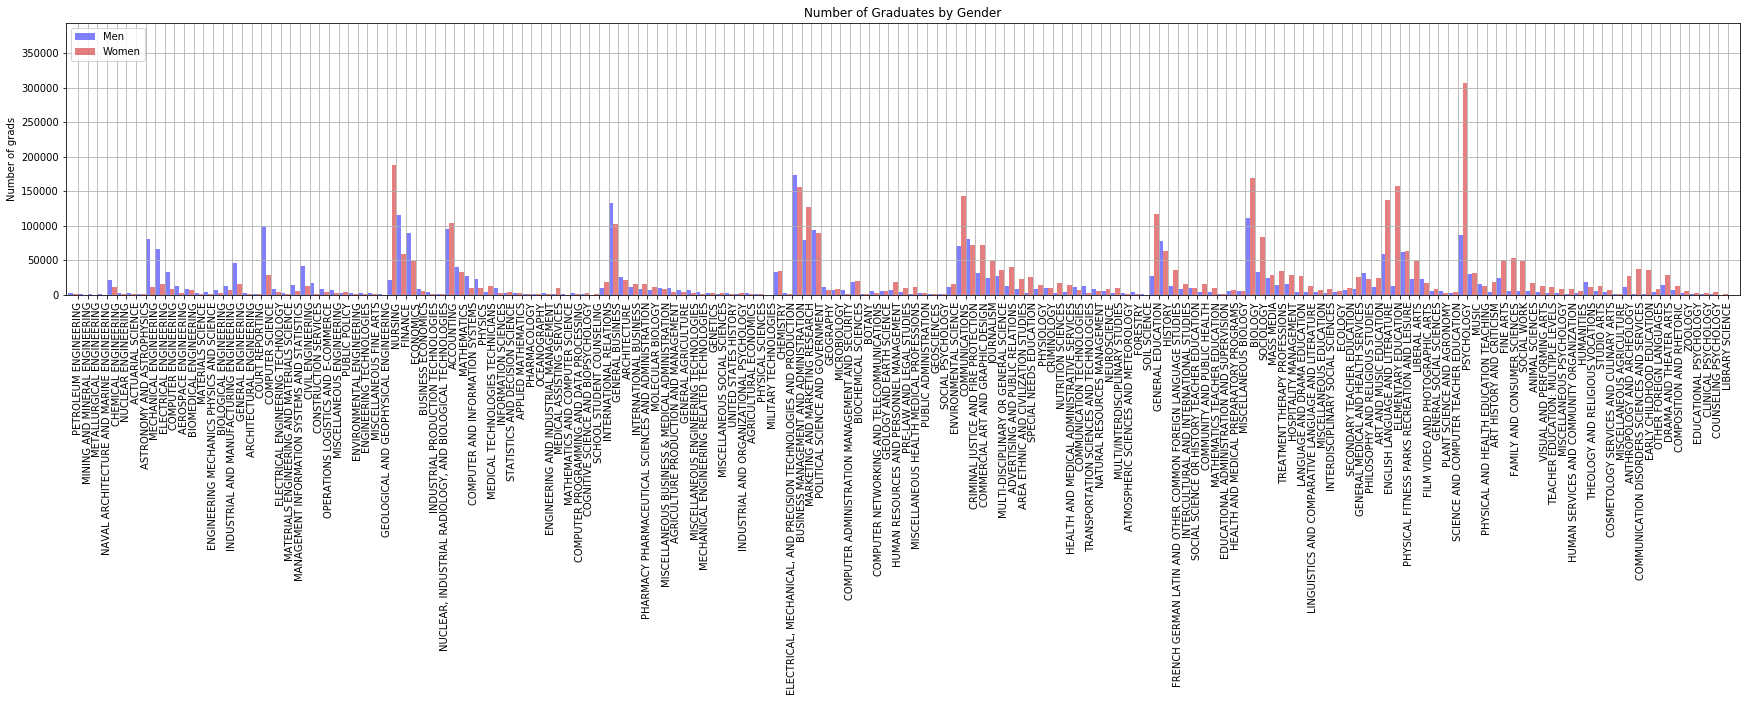

In [37]:
# Setting the positions and width for the bars
pos = list(range(len(recent_grads['Men']))) 
width = 0.5 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(30,5))

# Create a bar with Men data,
# in position pos,
plt.bar(pos, 
        #using recent_grads['Men'] data,
        recent_grads['Men'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#0000FF', 
        # with label the first value in first_name
        label=recent_grads['Major'][0]) 

# Create a bar with Women data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        recent_grads['Women'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#CD0000',
        # with label the second value in first_name
        label=recent_grads['Major'][1])

# Set the y axis label
ax.set_ylabel('Number of grads')

# Set the chart's title
ax.set_title('Number of Graduates by Gender')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(recent_grads['Major'],rotation = 90)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(recent_grads['Men'] + recent_grads['Women'])] )

# Adding the legend and showing the plot
plt.legend(['Men', 'Women'], loc='upper left')
plt.grid()
plt.show()

Observation : Majors where dominantly Women are Nursing, General Education, Communications, Biology, English Language and Literature, Elementary Education, Psychology.
Majors where dominantly Men are Mechanical Engineering, Electrical Engineering, Computer Science... 

##### Use a box plot to explore the distributions of median salaries and unemployment rate.

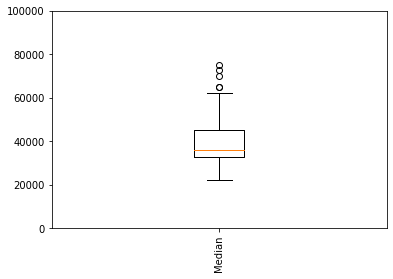

In [38]:
num_cols = ['Median']

fig, ax = plt.subplots()

ax.boxplot(recent_grads[num_cols].values)
ax.set_xticklabels(num_cols,rotation = 90)

ax.set_ylim(0,100000)

plt.show()

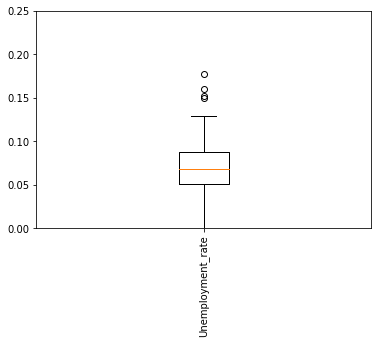

In [39]:
num_cols = ['Unemployment_rate']

fig, ax = plt.subplots()

ax.boxplot(recent_grads[num_cols].values)
ax.set_xticklabels(num_cols,rotation = 90)

ax.set_ylim(0,0.25)

plt.show()

Observation, Median centers around 30K. First Quartile is about 20K. Third Quartile is about 60K. 
Unemployment rate centers arount 0.07. First Quartile is about 0.05. Third Quartile is about 0.125. 

##### Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

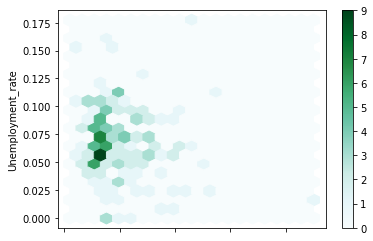

In [40]:
# Comparing Median and Unemployment Rate
recent_grads.plot.hexbin(x='Median', y='Unemployment_rate',gridsize=20)

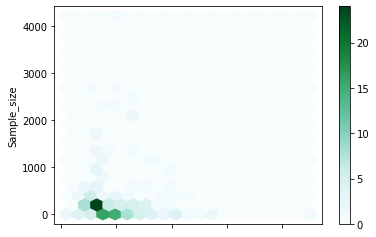

In [41]:
# Comparing Median and Sample Size
recent_grads.plot.hexbin(x='Median', y='Sample_size',gridsize=20)

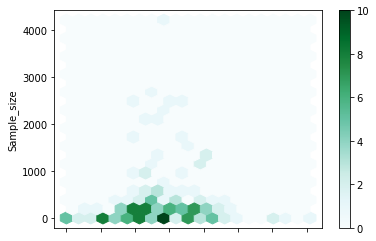

In [42]:
# Comparing Unemployment Rate and Sample Size
recent_grads.plot.hexbin(x='Unemployment_rate', y='Sample_size',gridsize=20)